In [14]:
import pandas as pd
import seaborn as sns
import numpy as np

In [15]:
data = pd.read_csv("2018MT10742.csv")["x"]

<AxesSubplot:>

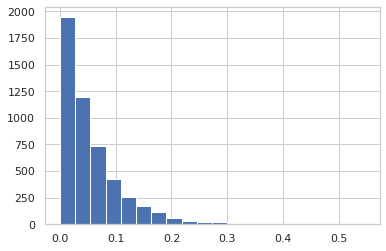

In [16]:
data.hist(bins=20)

In [17]:
# BAR CHART HOW?!??

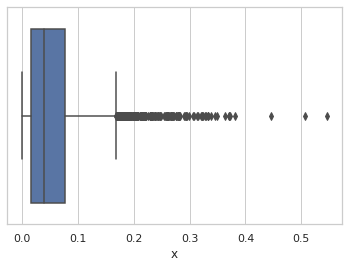

In [18]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data)

In [20]:
print(f"Mean = {data.mean()}")
print(f"Median = {data.median()}")
# print(f"Mode = {data.mode()}") Mode how?
print(f"Coefficient of variation = {np.sqrt(data.var()) / data.mean()}")
print(f"Skewness = {data.skew()}")
print(f"Kurtosis = {data.kurtosis()}")

Mean = 0.05542199485096252
Median = 0.03798825798245765
Coefficient of variation = 1.014388462069229
Skewness = 2.054355085588827
Kurtosis = 6.356203008806815


In [21]:
from scipy.stats import expon

expon.fit(data)

(2.13650572631094e-05, 0.05540062979369941)